In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



In [2]:
yelp_reviews=pd.read_csv("dataset/review.csv",usecols=["stars","text"])
yelp_reviews.head(15)


,text,stars
0,"Love the staff, love the meat, love the place....",5
1,Super simple place but amazing nonetheless. It...,5
2,Small unassuming place that changes their menu...,5
3,Lester's is located in a beautiful neighborhoo...,5
4,Love coming here. Yes the place always needs t...,4
5,Had their chocolate almond croissant and it wa...,4
6,Cycle Pub Las Vegas was a blast! Got a groupon...,5
7,Who would have guess that you would be able to...,4
8,Always drove past this coffee house and wonder...,4
9,"Not bad!! Love that there is a gluten-free, ve...",3


In [3]:
x=yelp_reviews['stars'].value_counts()
y=x.sort_index()
reviews = yelp_reviews[yelp_reviews['text'].map(len) > 1000]
reviews = reviews[:100000]


In [4]:
reviews["labels"]= reviews["stars"].apply(lambda x: 2 if x > 3  else 1 if x == 3 else 0  )
reviews = reviews.reset_index().drop(columns='index')


In [8]:
print reviews['text'][5]

Came here for a friend's birthday. She had looked it up and thought it sound good. First of all, when we made reservations, they only had a 7pm time slot for us (we were looking for 8pm) and when we were there, we were seated in the lower area of the restaurant, which was pretty empty.

There was an extensive menu, everything on the menu sound good, but when we got our food - there was nothing special, especially for what we paid for it. 

The pizza's are huge portions - so if you order it, make sure you share it.

There are 3 risottos on the menu, the seasonal vegetable one is the better one. Some of the pastas were portioned differently, some were huge, others were tiny - so be careful!

The food came out really fast after we ordered, so fast, that some of the food was cold (not sure if they make it in advance and just heat up afterwards). The desserts took forever to come.

At the end of the night when the bill came, there was a water service charge ($12.50) for 9 people for just ge

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    min_df=5, max_features=100, strip_accents='unicode',lowercase =True,
    analyzer='word', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', use_idf=True,
    smooth_idf=True, sublinear_tf=True, stop_words = 'english').fit(reviews["text"])

features = tfidf.get_feature_names()
print(features)


[u'actually', u'amazing', u'area', u'asked', u'away', u'bad', u'bar', u'best', u'better', u'big', u'bit', u'called', u'came', u'car', u'check', u'cheese', u'chicken', u'come', u'd', u'day', u'definitely', u'delicious', u'did', u'didn', u'different', u'dinner', u'don', u'drinks', u'eat', u'experience', u'feel', u'food', u'fresh', u'friendly', u'going', u'good', u'got', u'great', u'home', u'hot', u'just', u'know', u'left', u'like', u'little', u'll', u'location', u'long', u'looking', u'lot', u'love', u'm', u'make', u'meal', u'menu', u'minutes', u'need', u'new', u'nice', u'night', u'order', u'ordered', u'people', u'pizza', u'place', u'pretty', u'price', u'really', u'restaurant', u'right', u'room', u's', u'said', u'salad', u'sauce', u'say', u'server', u'service', u'small', u'staff', u'sure', u't', u'table', u'thing', u'things', u'think', u'time', u'times', u'told', u'took', u'try', u've', u'vegas', u'wait', u'want', u'wanted', u'wasn', u'way', u'went', u'work']


In [27]:
X_tfidf_text = tfidf.transform(reviews["text"])
sub2 = pd.DataFrame(X_tfidf_text.toarray())#.reset_index()
sub = reviews#.reset_index()
#Also adding variety for better readibility
#subdata_2['variety'] = subdata['variety']


In [29]:
sub2['labels'] = sub['labels']
sub2.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,labels
0,0.2242,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.180386,0.0,0.000000,0
1,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.195449,0.000000,...,0.168433,0.0,0.0000,0.191398,0.000000,0.000000,0.000000,0.0,0.000000,0
2,0.0000,0.000000,0.0,0.305961,0.0,0.265208,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0000,0.000000,0.000000,0.308185,0.000000,0.0,0.000000,1
3,0.0000,0.000000,0.0,0.301467,0.0,0.229810,0.0,0.0,0.000000,0.142205,...,0.000000,0.0,0.0000,0.000000,0.000000,0.127251,0.000000,0.0,0.141609,0
4,0.0000,0.162431,0.0,0.000000,0.0,0.148640,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.3064,0.000000,0.145916,0.292453,0.000000,0.0,0.000000,2


In [32]:
from sklearn.cross_validation import train_test_split
seed = 7

#Split into train and test
test_size = 0.2
y = sub2['labels']
X = sub2.drop(['labels'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# fit model no training data
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth=30, n_estimators=50, learning_rate=0.05)

clf.fit(X_train, y_train)



XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=30,
       min_child_weight=1, missing=None, n_estimators=50, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [33]:
#Measuring accuracy
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print"Accuracy: %.2f%%" % (accuracy * 100.0)

Accuracy: 68.39%


[ 2.95010891  3.04254119  2.84295751  2.59146066  2.89813049  2.78421805
  2.88066626  2.52006435  2.54670788  2.91706062  2.70238591  3.04795287
  2.19333964  3.7304592   2.93020429  3.02640379  2.90900016  2.37992475
  2.80351822  2.48215469  2.65984687  2.88086301  2.15760825  2.12132813
  2.89659679  3.013514    2.05927658  3.1296507   2.85126473  2.45133367
  2.89946604  1.81751931  3.02868238  2.75963147  2.42562748  1.65234159
  2.0954573   2.00376676  2.9556776   3.14713099  1.58885122  2.31283088
  2.92231105  1.59179264  2.32833739  2.78517129  3.12721423  2.77774823
  2.90657444  2.76079419  2.77910994  2.14222941  2.35589155  2.9196483
  2.54361336  2.71903959  2.92786414  2.66427375  2.27608766  2.65465451
  2.39922751  2.34071933  2.30417153  3.94561966  1.69203781  2.49077638
  2.90583443  1.9341338   2.44495094  2.43423489  2.93476263  1.39478743
  2.38710468  3.20175478  2.85925633  2.50032449  3.2166009   1.93415925
  2.78320624  2.68524963  2.55642861  1.26450954  2.

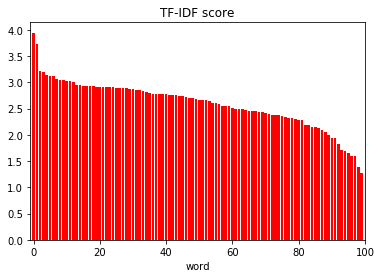

In [36]:
idf_score = tfidf.idf_
idf_sort = np.argsort(idf_score)[::-1]
print idf_score
# Plot the feature importances of the forest
plt.figure()
plt.xlabel('word')
plt.title("TF-IDF score")
plt.bar(range(100), idf_score[idf_sort],
       color="r",align="center")
plt.xlim([-1, X.shape[1]])
feature_score = []
for order in idf_sort:
    feature_score.append(features[order])
print feature_score


In [37]:
print idf_sort

[63 13 76 73 39 27 46 92 11  1 32 15 25 38  0 70 14 56 42 53  9 16 48 66 99
 30  4 24 84 21  6 74 28  2 87 18 45  5 78 50 47 49 33 83 93 95 55 10 82 79
 57 20 59 89 96 88  3 80  8 54  7 75 94 65 19 85 29 68 69 34 90 60 72 17 97
 52 61 44 41 62 98 58 91 12 22 51 23 36 26 37 77 67 31 86 64 35 43 40 71 81]


In [38]:
Depth = [2,5,10,20,50,60]
accuracy = []
for c in Depth:
    clf = xgb.XGBClassifier(max_depth=c, n_estimators=60, learning_rate=0.05)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    #Measuring accuracy
    from sklearn.metrics import accuracy_score
    accuracy.append(accuracy_score(y_pred, y_test))
    print("Accuracy: %.2f%%" % (accuracy[-1] * 100.0))

Accuracy: 65.12%
Accuracy: 67.58%
Accuracy: 69.06%
Accuracy: 69.05%
Accuracy: 68.64%
Accuracy: 68.36%


(0.4, 0.8)

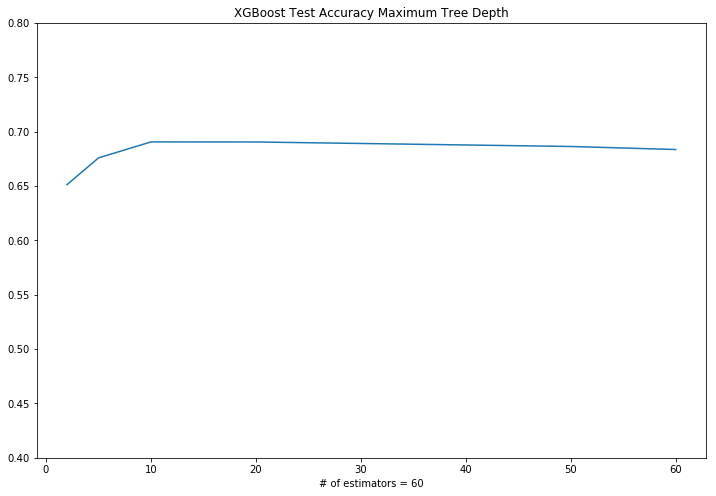

In [41]:
plt.figure()
plt.figure(figsize=(12,8))
plt.xlabel('# of estimators = 60')
plt.title("XGBoost Test Accuracy Maximum Tree Depth")
plt.plot(Depth,accuracy)
plt.ylim([0.4,0.8])